In [9]:
# STEP 1: IMPORT THE PACKAGES

import numpy as np
import pandas as pd

In [10]:
# STEP 2: LOAD DATA “train_final.csv” WHILE ASSIGNING -1 AS NULL VALUES

train = pd.read_csv('/Users/sanket/Downloads/train_final.csv',na_values=-1)
print('train.csv number of rows and columns:',train.shape)

train.csv number of rows and columns: (43388, 31)


The target variable is "target", which is 1 if a claim was filed, and 0 otherwise. Also, the variables ending with "cat" are categorical, and those ending with "bin" are binary as per Kaggle website.

In [11]:
# STEP 3: SEPARATE TARGET AND FEATUES VARIABLES

features = train.drop(['target'], axis=1).values
targets = train.target.values

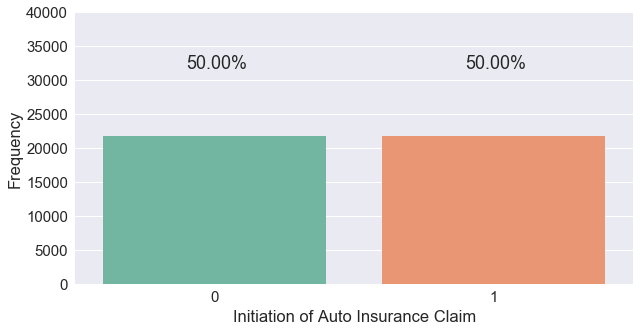

1    21694
0    21694
Name: target, dtype: int64

In [12]:
# STEP 4: EXPLORE “target” VARIABLE
import seaborn as sns
import matplotlib.pyplot as plt

targets = train.target.values
ax = sns.countplot(x = targets ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=40000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(targets)), (p.get_x()+ 0.3, p.get_height()+10000))
plt.xlabel('Initiation of Auto Insurance Claim')
plt.ylabel('Frequency')
plt.show()
train['target'].value_counts()

In [13]:
# STEP 5: SHOW NUMBER OF UNIQUE DATA TYPES

train.dtypes.value_counts()

int64      16
float64    15
dtype: int64

In [14]:
# STEP 6: FEATURE GROUPING INTO CATEGORICAL, BINARY, ORDINAL, AND ORDINAL DATA TYPES
# STEP 6a: Categorical (cat) and Binary (bin) Features based on information provided by kaggle

cat_cols = [col for col in train.columns if '_cat' in col]
bin_cols = [col for col in train.columns if '_bin' in col]

In [15]:
# STEP 6b: Ordinal (ord) and Continuous (con) Features based on Data Analysis (this was not provided by kaggle)
# STEP 6b.1: Find no. of unique values

def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train)


 Unique value of "id" is "43388" 

 Unique value of "target" is "2" 

 Unique value of "ps_ind_01" is "8" 

 Unique value of "ps_ind_02_cat" is "4" 

 Unique value of "ps_ind_03" is "12" 

 Unique value of "ps_ind_04_cat" is "2" 

 Unique value of "ps_ind_05_cat" is "7" 

 Unique value of "ps_ind_06_bin" is "2" 

 Unique value of "ps_ind_07_bin" is "2" 

 Unique value of "ps_ind_08_bin" is "2" 

 Unique value of "ps_ind_09_bin" is "2" 

 Unique value of "ps_ind_15" is "14" 

 Unique value of "ps_ind_16_bin" is "2" 

 Unique value of "ps_ind_17_bin" is "2" 

 Unique value of "ps_ind_18_bin" is "2" 

 Unique value of "ps_reg_01" is "10" 

 Unique value of "ps_reg_02" is "19" 

 Unique value of "ps_reg_03" is "4184" 

 Unique value of "ps_car_01_cat" is "12" 

 Unique value of "ps_car_02_cat" is "2" 

 Unique value of "ps_car_04_cat" is "10" 

 Unique value of "ps_car_06_cat" is "18" 

 Unique value of "ps_car_07_cat" is "2" 

 Unique value of "ps_car_08_cat" is "2" 

 Unique value of "p

In [16]:
# STEP 6b.2: Convert variables into category type, and then derive nominal and continuous features
# The unique value of "ps_car_11_cat" is maximum in the data set and is equal to 104

def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')

category_type(train)

tot_cat_col = list(train.select_dtypes(include=['category']).columns)
ord_cols = [n for n in tot_cat_col if n not in cat_cols + bin_cols +['target']]
con_cols = [c for c in train if c not in cat_cols + bin_cols + ord_cols + ['target']]

train.dtypes.value_counts()

category    26
float64      4
int64        1
dtype: int64

In [17]:
# STEP 6c: Final Feature rgouping

print(len(cat_cols), ' cat_cols:', cat_cols)
print('---------')
print(len(bin_cols), ' bin_cols:', bin_cols)
print('---------')
print(len(ord_cols), ' ord_cols:', ord_cols)
print('---------')
print(len(con_cols), ' con_cols:', con_cols)

11  cat_cols: ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat']
---------
7  bin_cols: ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
---------
7  ord_cols: ['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_car_11', 'ps_car_15']
---------
5  con_cols: ['id', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']


In [18]:
# STEP 7: CCHECK FOR MISSING VALUES, IF ANY

cols_missing_val_train_after = train.columns[train.isnull().any()].tolist()
cols_missing_val_train_after

[]

In [19]:
# STEP 8: DETERMINE OUTLIERS IN CONTINUOUS FEATURES

def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(train,con_cols)


id -745237.5 2228954.5 15221.61 1473965.57
ps_reg_03 0.12925387485 1.60910116645 0.4272001873 1.8867962264
ps_car_12 0.15417331195 0.58631852275 0.3155946768 0.5744562647


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ps_car_13 0.3014015283 1.3268429835 0.456540164648 1.67824297075
ps_car_14 0.2805456883 0.4676600083 0.2887905816 0.5329165038


In [20]:
# STEP 9: ONE HOT ENCODING

def OHE(df1,df2,column):
    cat_col = column
    #cat_col = x_train.select_dtypes(include =['category']).columns
    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    c2,c3 = [],{}
    
    print('Categorical feature',len(column))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

train1,test1 = OHE(train,train,tot_cat_col)
print('------\n', train1.dtypes.value_counts())

Categorical feature 26
Train (43388, 245)
Test (43388, 245)
------
 uint8       228
category     12
float64       5
dtype: int64


In [21]:
# STEP 10: SPLIT DATA AFTER ONE HOT ENCODING

x1_train = train1.drop(['target'],axis=1)
y1_train = train1['target'].astype('category')
x1_test = test1.drop(['target'],axis=1)
del train1,test1
print('------\n', x1_test.dtypes.value_counts())

------
 uint8       228
category     11
float64       5
dtype: int64


In [22]:
# STEP 11: LOGISTIC REGRESSION
# STEP 11a: Logistic Regression Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

seed =45
kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(x1_train,y1_train):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x1_train.loc[train_index],x1_train.loc[test_index]
    ytr,yvl = y1_train[train_index],y1_train[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.005)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x1_test)[:,1]
    i+=1


1 of kfold 5
roc_auc_score 0.625071778864

2 of kfold 5
roc_auc_score 0.49328618312

3 of kfold 5
roc_auc_score 0.620381633301

4 of kfold 5
roc_auc_score 0.604408548801

5 of kfold 5
roc_auc_score 0.627115526826


In [23]:
# STEP 11b: Logistic Regression - Prediction and Performance

acc = lr.score(X = xvl, y = yvl)
print('LR Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('LR Accuracy:',acc*100, '%')
print('LR Mean cv Score:',np.mean(cv_score)*100,'%')
print('LR cv:',cv_score)

LR Confusion matrix
 [[2650 1688]
 [1879 2459]]
LR Accuracy: 58.8865836791 %
LR Mean cv Score: 59.4052734182 %
LR cv: [0.62507177886389398, 0.49328618312043698, 0.62038163330052742, 0.60440854880094308, 0.6271155268259887]


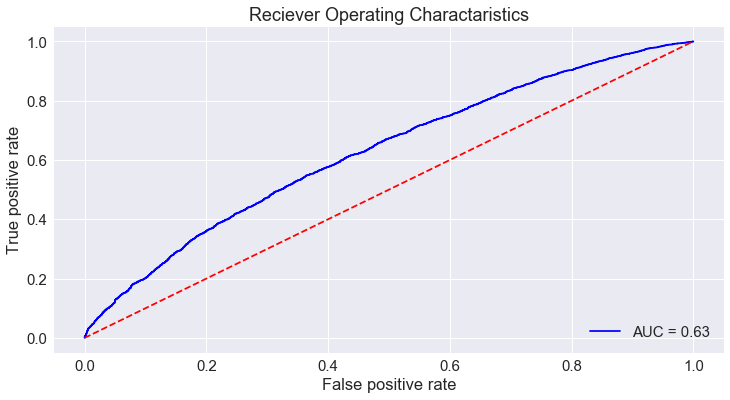

In [24]:
# STEP 11c: Logistic Regression - Receiver Operating Characteristics

import matplotlib.pyplot as plt
%matplotlib inline

proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(12,6))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')